In [21]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
# Import the requests library
import requests

# Import the API key
from config import weather_api_key
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000,size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates[0][0]

85.36355446184263

In [6]:
# Create a list of holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]}")
    print(city_url)
    # Add 1 to the record count.
    record_count +=1

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c&q=qaanaaq
Processing Record 2 of Set 1 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c&q=kysyl-syr
Processing Record 3 of Set 1 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c&q=cururupu
Processing Record 4 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c&q=ushuaia
Processing Record 5 of Set 1 | altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c&q=altamira
Processing Record 6 of Set 1 | jijiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c44ca1e44bf918a4278ea00b700eff1c&q=jijiang
Processing Record 7 of Set 1 | nec

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 0

# Loop through all the cities in the list
for i,city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 0):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | kysyl-syr
Processing Record 3 of Set 1 | cururupu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | altamira
Processing Record 6 of Set 1 | jijiang
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | rabo de peixe
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | karaul
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | mountain home
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | warrington
Processing Record 20 of Set 1 | chicama
Processing Record 21 of Set 1 | viedma

Processing Record 37 of Set 4 | san quintin
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | portoferraio
Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | likasi
Processing Record 42 of Set 4 | conde
Processing Record 43 of Set 4 | cruz
Processing Record 44 of Set 4 | tandil
Processing Record 45 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | tiznit
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | rochelle
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | new haven
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | zielona gora
Processing Record 4 of Set 5 | abu samrah
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 of Set 5 | mareeba
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | japura
Processing Record 9 of Set 5 | san vicente
Processing Record 10 of Set 5 | ya

Processing Record 28 of Set 8 | neryungri
Processing Record 29 of Set 8 | port hedland
Processing Record 30 of Set 8 | sfantu gheorghe
Processing Record 31 of Set 8 | half moon bay
Processing Record 32 of Set 8 | celestun
Processing Record 33 of Set 8 | okhotsk
Processing Record 34 of Set 8 | ketchikan
Processing Record 35 of Set 8 | xining
Processing Record 36 of Set 8 | narsaq
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | padang
Processing Record 39 of Set 8 | broken hill
Processing Record 40 of Set 8 | kurilsk
Processing Record 41 of Set 8 | crib point
Processing Record 42 of Set 8 | nagua
Processing Record 43 of Set 8 | ziarat
Processing Record 44 of Set 8 | sabha
Processing Record 45 of Set 8 | satitoa
City not found. Skipping...
Processing Record 46 of Set 8 | mildura
Processing Record 47 of Set 8 | sorland
Processing Record 48 of Set 8 | williston
Processing Record 49 of Set 8 | cascais
Processing Record 50 of Set 8 | vieques
Processing Record 1 of Set 9 | 

Processing Record 18 of Set 12 | outjo
Processing Record 19 of Set 12 | san ramon de la nueva oran
Processing Record 20 of Set 12 | pozo colorado
Processing Record 21 of Set 12 | saint-georges
Processing Record 22 of Set 12 | bhag
Processing Record 23 of Set 12 | uni
Processing Record 24 of Set 12 | kushmurun
Processing Record 25 of Set 12 | gizo
Processing Record 26 of Set 12 | teya
Processing Record 27 of Set 12 | quebo
Processing Record 28 of Set 12 | carupano
Processing Record 29 of Set 12 | mantua
Processing Record 30 of Set 12 | ovre ardal
Processing Record 31 of Set 12 | simbahan
Processing Record 32 of Set 12 | talara
Processing Record 33 of Set 12 | oktyabrskiy
Processing Record 34 of Set 12 | xingcheng
Processing Record 35 of Set 12 | oranjemund
Processing Record 36 of Set 12 | marsa matruh
Processing Record 37 of Set 12 | lata
Processing Record 38 of Set 12 | zalantun
Processing Record 39 of Set 12 | tromso
Processing Record 40 of Set 12 | port blair
Processing Record 41 of 

In [9]:
len(city_data)

578

In [13]:
# Convert the arry of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-03-29 01:25:09,77.4840,-69.3632,-20.70,74,74,5.44
1,Kysyl-Syr,RU,2021-03-29 01:34:58,63.8986,122.7617,25.61,91,87,4.03
2,Cururupu,BR,2021-03-29 01:32:00,-1.8283,-44.8683,73.63,97,84,2.98
3,Ushuaia,AR,2021-03-29 01:34:26,-54.8000,-68.3000,42.80,75,0,9.22
4,Altamira,BR,2021-03-29 01:34:58,-3.2033,-52.2064,72.01,97,98,2.33
5,Jijiang,CN,2021-03-29 01:34:58,29.2906,106.2542,69.80,60,0,2.24
6,Necochea,AR,2021-03-29 01:34:59,-38.5473,-58.7368,55.99,96,7,7.87
7,Rabo De Peixe,PT,2021-03-29 01:34:44,37.8000,-25.5833,59.00,82,75,10.36
8,Kapaa,US,2021-03-29 01:34:24,22.0752,-159.3190,75.20,73,20,17.27
9,Rikitea,PF,2021-03-29 01:34:22,-23.1203,-134.9692,79.75,71,1,15.05


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

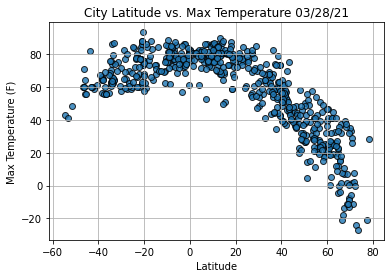

In [27]:
# Import the time module
import time
# Get today's date in seconds.
today = time.strftime("%x")

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor = "black",
           linewidth = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

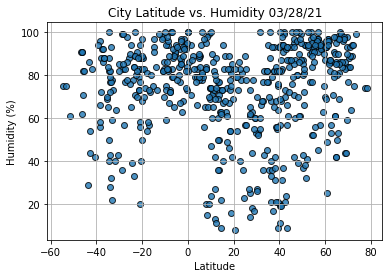

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, 
            humidity, 
            edgecolor = "black",
           linewidth = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

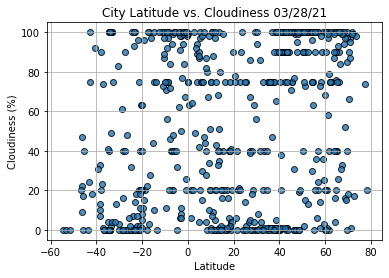

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness, 
            edgecolor = "black",
           linewidth = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

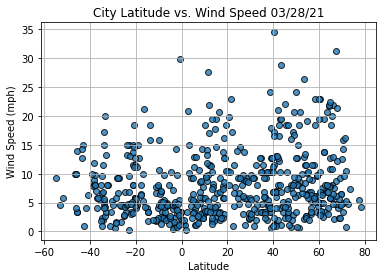

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
            wind_speed, 
            edgecolor = "black",
           linewidth = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats,temps)
# Get the equation of the line.
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y= -0.45x + 92.94
The p-value is: 0.011


In [35]:
# Calculate the regression line "y values" from slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

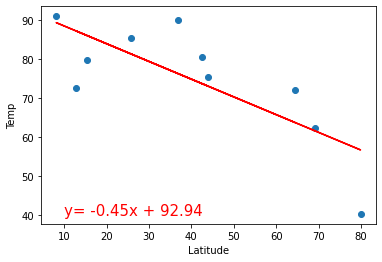

In [36]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2021-03-29 01:30:12
Lat                       55.7435
Lng                      -97.8558
Max Temp                       23
Humidity                       93
Cloudiness                     90
Wind Speed                   6.91
Name: 13, dtype: object

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

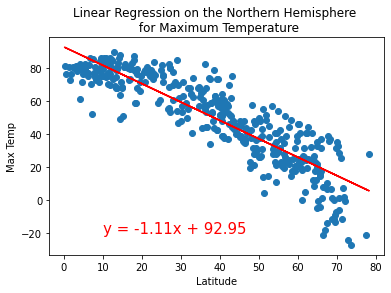

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

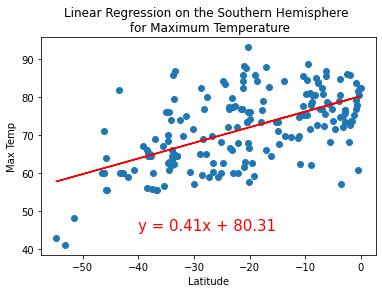

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-40,45))

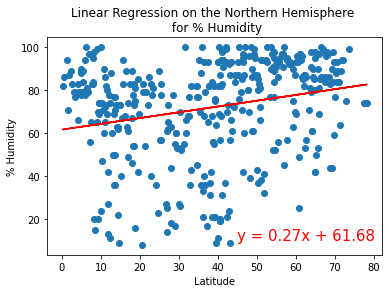

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

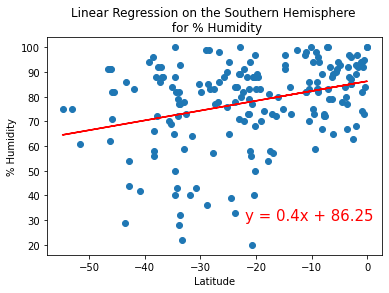

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-22,30))

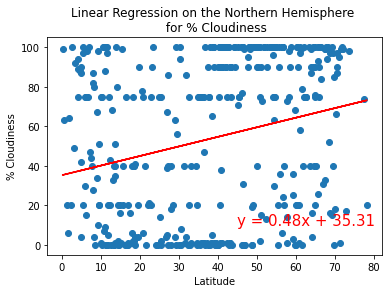

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

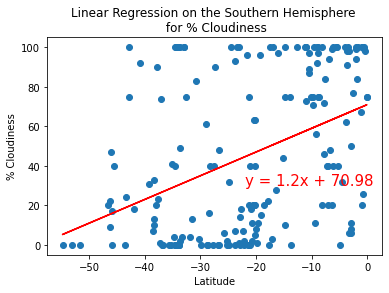

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-22,30))

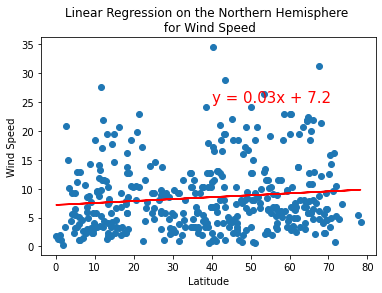

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

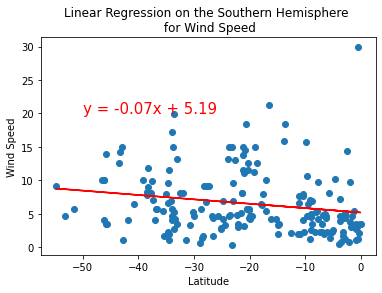

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))